# What Review Scores Mean for Games
## Tyler Honeywell

In recent years, public opinions on the media we consume have been increasingly dominated by the idea of scores. Where once we might have judged a movie or video game based on promotional material, box art, and description, now consumers tend to look to secondhand opinions prior to a purchase, or even free download. It might be opinions from friends or reading full reviews online, but generally the easiest way to get an impression of whether to spend time or money on a piece of media is to look at the scores it recieves.
Reviews can be found in hundreds of places online, and take many forms. Some score with stars, some with points, some with percentages. Some take the form of recommend/don't recommend, and some have no scoring system at all. In this analysis, we'll take a look at two platforms that handle reviews for games:

## Metacritic
[Metacritic](metacritic.com) is a review aggregation site, which compiles data from numerous other partnered sites as well as non-critic user reviews. This takes the form of two separate scores - a "metascore", compiled from the weighted average of reviews from a number of partnered sites, and a user score, from reviews submitted by users of the site. The metascore is on a scale of 0 to 100, while the user score is on a scale of 0 to 10, with one decimal place. Essentially, they are on the same scale.

## Steam
[Steam](store.steampowered.com) is a PC-based game launcher and marketplace with a user review feature. Reviews take the form of "Recommend" or "Don't Recommend", compiled into a percentage and accompanying descriptor, such as "Mostly Positive," "Mixed," or "Overwhelmingly Negative." Steam also has a separate category for recent reviews - this is a measure to better inform the potential buyer of the nature of the reviews, and is implemented in addition to systems that detect large volumes of reviews in a short time. Games which are being "review bombed" - recieving a large number of negative reviews due to some controversy in the community - are somewhat protected by this system, informing the buyer that the game's score may not be accurate to the actual value of the game. This also helps games which are being continuously developed while available for purchase - as the game grows and improves the reviews will become more positive, and older reviews will no longer be accurate to the state of the game.

---
## Goals of Our Analysis

Using data science, we can explore the following questions about game reviews:
- How much does a review score predict or impact the sales figures of a game?
- In what ways do user and critic scores differ? Is one group more pessimistic than another?
- Which genre, platform, and ESRB rating is the highest scoring?
- Have reviewers become more or less generous with their scores over time?

# Starting Off

For this analysis, we'll be using the following Python libraries:

Pandas - Allows us to store data in DataFrames, and do most data processing operations.  
Numpy - Mathematics backbone for our analysis.  
Matplotlib - The backbone for making plots of our data.  
Seaborn - A plotting utility with a wide array of plots to choose from.  
Sklearn - A machine learning utility that enables predictions and regressions.  

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model

# Data Collection

A vital part of the data science pipeline is acquiring usable data.
For this analysis, I searched for existing datasets using Kaggle, an online service with a number of publically available datasets to choose from. This was the much easier option, compared to scraping these sites directly or using an API, since we would be working with a monumental amount of data. Additionally, websites have become increasingly protective of their data and hostile to scraping in recent years.  
I located this [Metacritic](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings) dataset from 2016, as well as this [Steam](https://www.kaggle.com/nikdavis/steam-store-games?select=steam.csv) dataset from 2019. Both sets of data are stored as CSV, or comma-separated-value, files, which we can read into a DataFrame using Pandas.

In [2]:
# Create our DataFrames
mc = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
stm = pd.read_csv('steam.csv')

Let's take a look at our two datasets.

In [3]:
mc.head(8)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
stm.head(8)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19


There is a lot to work with here.  

In our Metacritic dataset, we have releases on each platform, genres, publishers, developers, sales in 4 different regions, developers, and ESRB rating, aside from the reviews we are primarily interested in. However, we also have missing data, which is represented as "NaN" in the table.  

In the Steam dataset, we have the unique app ID used by Steam, developers and publishers, the age required to see the game's listing, and a handful of other things like tags.

## Tidying Data

Let's begin tidying up our first dataset - the Metacritic reviews.

We aren't interested in the sales in different regions, so we can drop them from the dataset. We also won't be able to do any useful analysis with the data that is missing, so we drop any entry with missing data. Lastly, it will be helpful to convert the user score to be on the same scale as the critic score so we can compare them later on.

In [5]:
mc = mc.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
mc = mc.dropna()
mc['User_Score'] = mc['User_Score'].astype(float) * 10

In [6]:
mc.head(8)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,66.0,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.32,87.0,80.0,84.0,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,23.21,91.0,64.0,86.0,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,22.70,80.0,63.0,77.0,146.0,Nintendo,E


For the second dataset, there are a lot more attributes we don't care about. We can drop them to get it looking a lot cleaner. We also need to do some conversions. To align with our first dataset, let's simplify "release-date" to be the year of release, and "owners" to be the middle of the estimated number of users, divided by one million to make the numbers line up.

In [7]:
stm = stm.drop(['appid', 'english', 'platforms', 'required_age', 'steamspy_tags', 'achievements', 'categories'], axis=1)

release_years = []
owners_avg = []
for i in stm.iterrows():
    release_years += [float(i[1]['release_date'][:4])]
    owners = i[1]['owners'].split('-')
    owners_avg += [((float(owners[0]) + float(owners[1])) / 2) / 1000000]
stm['release_date'] = release_years
stm['owners'] = owners_avg
stm['percent_score'] = stm['positive_ratings'] / (stm['positive_ratings'] + stm['negative_ratings'])

In [8]:
stm.head(8)

,name,release_date,developer,publisher,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,percent_score
0,Counter-Strike,2000.0,Valve,Valve,Action,124534,3339,17612,317,15.0,7.19,0.973888
1,Team Fortress Classic,1999.0,Valve,Valve,Action,3318,633,277,62,7.5,3.99,0.839787
2,Day of Defeat,2003.0,Valve,Valve,Action,3416,398,187,34,7.5,3.99,0.895648
3,Deathmatch Classic,2001.0,Valve,Valve,Action,1273,267,258,184,7.5,3.99,0.826623
4,Half-Life: Opposing Force,1999.0,Gearbox Software,Valve,Action,5250,288,624,415,7.5,3.99,0.947996
5,Ricochet,2000.0,Valve,Valve,Action,2758,684,175,10,7.5,3.99,0.801278
6,Half-Life,1998.0,Valve,Valve,Action,27755,1100,1300,83,7.5,7.19,0.961878
7,Counter-Strike: Condition Zero,2004.0,Valve,Valve,Action,12120,1439,427,43,15.0,7.19,0.893871


# Exploratory Data Analysis



With our data nicely polished, let's move on to some analysis.  
In the EDA phase of data science, we want to learn more about our data through the use of data visualization and statistics. This is to help us get a grasp of what we can do with our data, as well as some of its basic properties.

A personal favorite of mine is the scatter plot. It gives a sense of the general layout of your data, and whether or not two variables are correlated. Let's see how critic score measures against sales figures.

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

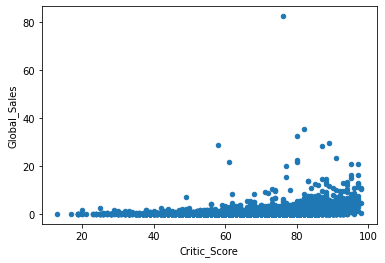

In [9]:
mc.plot.scatter(x = 'Critic_Score', y = 'Global_Sales')

Looks like a stray datapoint is making for an ugly graph - Wii Sports blows every other game out of the water in terms of overall sales. Let's take it out and try again.

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

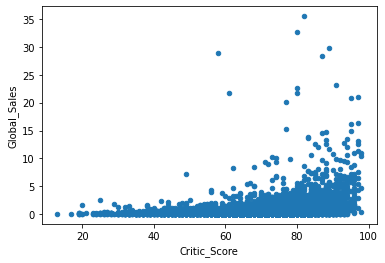

In [10]:
mc[mc['Name'] != 'Wii Sports'].plot.scatter(x = 'Critic_Score', y = 'Global_Sales')

And just from this basic visualization, we can see that critical reception seems to correlate with number of copies sold. But what about user reception? They are the ones going out and buying copies, after all.

<AxesSubplot:xlabel='User_Score', ylabel='Global_Sales'>

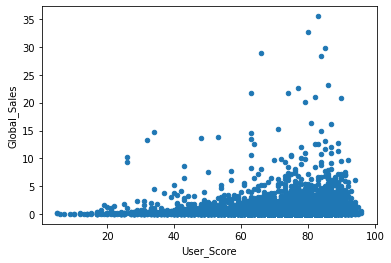

In [11]:
mc[mc['Name'] != 'Wii Sports'].plot.scatter(x = 'User_Score', y = 'Global_Sales')

Now we start to see something a bit unexpected. And this is part of why EDA is helpful in getting to know your data. There seems to be a tendency for better selling games to be incapable of getting scores that are extremely high - in the 96-100 range - that was not present in the critic scores. 

Let's see if we find the same to be true of Steam games.

<AxesSubplot:xlabel='percent_score', ylabel='owners'>

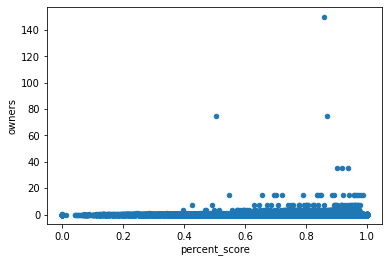

In [12]:
stm.plot.scatter('percent_score', 'owners')

Another ugly looking graph. Due to the nature of the data we used, our values of "owners" are very rough. And what are the outliers here? It seems our highest datapoint has 150 million copies sold. That's higher than our previous best, Wii Sports. Is that right? Let's look at our games with the most users.

In [13]:
stm.sort_values('owners', ascending=False).head(8)

,name,release_date,developer,publisher,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,percent_score
22,Dota 2,2013.0,Valve,Valve,Action;Free to Play;Strategy,863507,142079,23944,801,150.0,0.00,0.858710
25,Counter-Strike: Global Offensive,2012.0,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,2644404,402313,22494,6502,75.0,0.00,0.867952
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017.0,PUBG Corporation,PUBG Corporation,Action;Adventure;Massively Multiplayer,496184,487076,22938,12434,75.0,26.99,0.504632
19,Team Fortress 2,2007.0,Valve,Valve,Action;Free to Play,515879,34036,8495,623,35.0,0.00,0.938107
3362,Unturned,2017.0,Smartly Dressed Games,Smartly Dressed Games,Action;Adventure;Casual;Free to Play;Indie,292574,31482,3248,413,35.0,0.00,0.902850
1634,Warframe,2013.0,Digital Extremes,Digital Extremes,Action;Free to Play,226541,20268,5845,394,35.0,0.00,0.917880
1727,War Thunder,2013.0,Gaijin Entertainment,Gaijin Entertainment,Action;Free to Play;Massively Multiplayer;Simu...,83852,22166,4200,297,15.0,0.00,0.790922
23,Portal 2,2011.0,Valve,Valve,Action;Adventure,138220,1891,1102,520,15.0,7.19,0.986504


Now we get a glimpse of why our "sales" are so high. 6 of the 8 most owned games are free-to-play. That is, they don't cost money to start playing. Maybe we should take a look at only games that require a purchase (whose price != 0) since they are quite different from bought games. We'll also exclude any games with > 10 million owners to get a closer look at the bottom of the graph.

<AxesSubplot:xlabel='percent_score', ylabel='owners'>

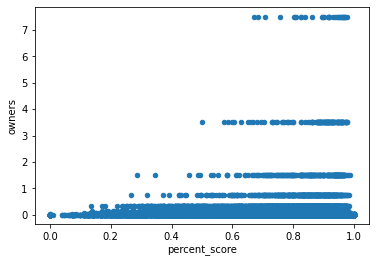

In [14]:
stm[(stm['price'] != 0) & (stm['owners'] < 10)].plot.scatter('percent_score', 'owners')

Still oddly shaped, but there is a very clear positive correlation! Additionally, we see a hint of the same phenomenon - only games with a low number of purchases will recieve near-perfect user scores.

---
Let's move on to more intriguing exploration - we were more or less certain that better scoring games sell better. What about the difference between user scores and critic scores? We might think to take the mean of both values in our DataFrame, but this isn't the true distribution of scores - we count games with a single reviewer the same as those with 100. To obtain a true estimate of the average score, we have to weight the scores for each game. It's important to remember what your data actually represents when trying to draw conclusions.

In [15]:
# Naive, incorrect calculation
[mc['Critic_Score'].mean(), mc['User_Score'].mean()]

[70.27208791208791, 71.85626373626374]

In [16]:
# Proper calculation
crt_avg = 0
usr_avg = 0
for i in mc.iterrows():
    crt_avg += i[1]['Critic_Score'] * i[1]['Critic_Count']
    usr_avg += i[1]['User_Score'] * i[1]['User_Count']
crt_avg /= mc['Critic_Count'].sum()
usr_avg /= mc['User_Count'].sum()
[crt_avg, usr_avg]

[73.92525385530881, 72.70557493626727]

From this simple metric, we can infer that critics are, in fact, more generous than users in their reviews.

An excellent way to view the overall distribution of data in a number of categories is through the use of a violin plot, which we can produce with the use of Seaborn. Violin plots are very similar to box plots, with extensions to more finely represent the distribution of the data. You can take a look at violin plots and Seaborn's other utilities on their [site](https://seaborn.pydata.org/introduction.html). Thicker parts of the "violin" represent locations in which a greater number of data points exist. Let's look at how our Metacritic data is distributed among the then-current-generation consoles, a few well-known publishers, and the most common ratings.

<AxesSubplot:xlabel='Platform', ylabel='Critic_Score'>

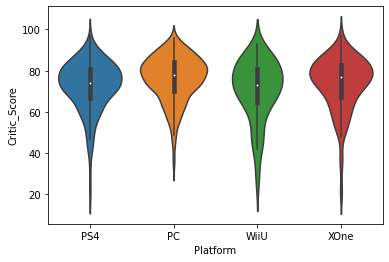

In [17]:
sns.violinplot(data=mc[mc['Platform'].isin(['PS4', 'XOne', 'PC', 'WiiU'])], x='Platform', y='Critic_Score')

<AxesSubplot:xlabel='Publisher', ylabel='Critic_Score'>

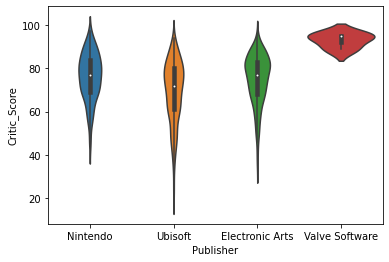

In [18]:
sns.violinplot(data=mc[mc['Publisher'].isin(['Nintendo', 'Ubisoft', 'Electronic Arts', 'Valve Software'])],
               x='Publisher', y='Critic_Score')

<AxesSubplot:xlabel='Rating', ylabel='Critic_Score'>

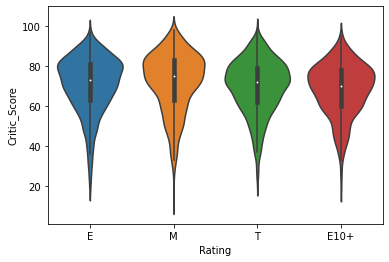

In [19]:
sns.violinplot(data=mc[mc['Rating'].isin(['E', 'E10+', 'T', 'M'])], x='Rating', y='Critic_Score')

<AxesSubplot:xlabel='Genre', ylabel='Critic_Score'>

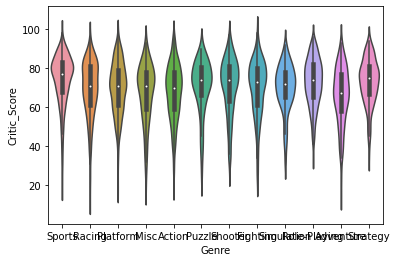

In [20]:
sns.violinplot(data=mc, x='Genre', y='Critic_Score')

<AxesSubplot:xlabel='release_date', ylabel='percent_score'>

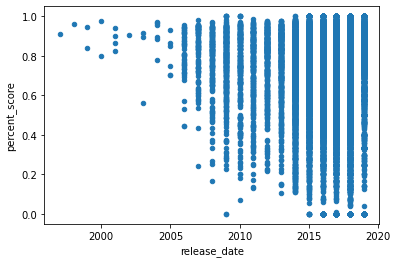

In [21]:
stm.plot.scatter(x='release_date', y='percent_score')

<AxesSubplot:xlabel='Year_of_Release', ylabel='User_Score'>

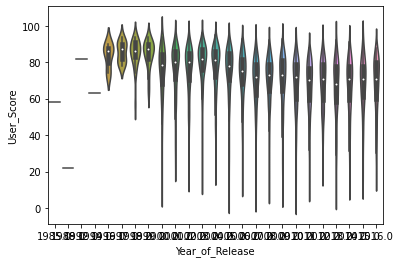

In [22]:
sns.violinplot(data=mc, x='Year_of_Release', y='User_Score')

In [23]:
mc_modern = mc[mc['Year_of_Release'] > 1999]

<AxesSubplot:xlabel='Year_of_Release', ylabel='User_Score'>

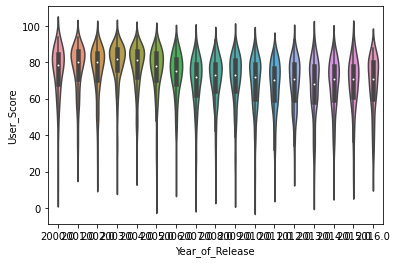

In [24]:
sns.violinplot(data=mc_modern, x='Year_of_Release', y='User_Score')

# Regression Analysis

Through EDA we can get a general idea of what our data looks like and draw a few conclusions about it. However, to prove something about our data rigorously we need to apply some statistics. Namely, we can use [linear regression](https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c) with scikit-learn to try to model the data and predict what outcome we might see given a certain set of inputs. Let's take the platforms and ESRB ratings we were previously interested in, and see which we should aim for to get our hypothetical game the best scores.

In [25]:
mc_reg = mc[mc['Platform'].isin(['PS4', 'XOne', 'PC', 'WiiU']) & mc['Rating'].isin(['E', 'E10+', 'T', 'M'])]

reg = linear_model.LinearRegression()
X = pd.get_dummies(data=mc_reg[['Year_of_Release', 'Platform', 'Genre', 'Rating']])
y = mc_reg['Critic_Score']

reg.fit(X, y)

LinearRegression()

In [26]:
coeff_parameter = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
Year_of_Release,-0.411318
Platform_PC,0.950696
Platform_PS4,0.110816
Platform_WiiU,-1.982338
Platform_XOne,0.920826
Genre_Action,-1.947479
Genre_Adventure,-2.351418
Genre_Fighting,-2.847026
Genre_Misc,-1.490753
Genre_Platform,1.496395


A positive coefficient here means that scores go up with the presence of a given variable. For example, being a Racing game gives you 2 points compared to not being a Racing game. Looking at these values, we can see that, in our data, it is best to be an M-rated puzzle game for PC.

# Conclusions

